For AstrinQ1012 Vs WT

In [2]:
# import necessary modules
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters
import skimage.color as color
from PIL import Image
import pandas as pd
from skimage.util import img_as_float
from skimage.color import label2rgb, rgb2gray,gray2rgb
from skimage import segmentation,morphology,feature,measure
from scipy import ndimage as ndi
import glob
from natsort import natsorted 
import os

In [3]:
# import function file
%run functions.ipynb

In [4]:
# path to the local folder for the notebooks
BASE_DIR="/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/" 
#path to the image folder.
IMAGE_DIR=BASE_DIR + "data/AMovie/"

#### A List for the Images Folders

In [12]:
wt_path=[IMAGE_DIR + "Exp2018_032_IV_HeLa_MG132_YFP-AstrinWT_CENPB-dsRed_GFP_mcherry03_R3D_D3D/"]

control_path=[IMAGE_DIR + "Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry03_R3D_D3D/"]

### Create The DataFrames and CSVs
#### With background correction

In [14]:
# uncomment the path for WildType and Control and run this cell again

#fol_path=list_cloning(wt_path)
fol_path=list_cloning(control_path)


for i in range(len(fol_path)):
    df_green,df_red=prewitt_method2_BG(fol_path[i])
    df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
    df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
    print("Datapoints before removing the outliers : " ,len(df_bg))
    df_bg.to_csv(fol_path[i]+'ParticleMeasurements-WithBGCorrection'+'.csv') # write to csv before removing the outliers
    df_bg=outliers(df_bg)
    df_bg.to_csv(fol_path[i]+'ParticleMeasurements-OutlierRemoved-WithBGCorrection'+'.csv') # write to csv after removing the outliers
    print("Datapoints after removing the outliers: " ,len(df_bg))

print("Method 2 with BG Correction is completed for %s folders"%(fol_path))

Datapoints before removing the outliers :  316
Datapoints after removing the outliers:  307
Method 2 with BG Correction is completed for ['/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/AMovie/Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry03_R3D_D3D/'] folders


### Without Background Correction

In [16]:
# uncomment the path for WildType and Control and run this cell again

#fol_path=list_cloning(wt_path)
fol_path=list_cloning(control_path)


for i in range(len(fol_path)):
    df_green,df_red=prewitt_method2_noBG(fol_path[i])
    df_bg=pd.merge(df_green, df_red,  how='outer',on=['label','area','eccentricity','perimeter'],suffixes=('_green', '_red'))
    df_bg['intensity_ratio'] = df_bg['mean_intensity_green']/df_bg['mean_intensity_red']
    print("Datapoints before removing the outliers : " ,len(df_bg))
    df_bg.to_csv(fol_path[i]+'ParticleMeasurements-WithOutBGCorrection'+'.csv') # write to csv before removing the outliers
    df_bg=outliers(df_bg)
    df_bg.to_csv(fol_path[i]+'ParticleMeasurements-OutlierRemoved-WithOutBGCorrection'+'.csv') # write to csv after removing the outliers
    print("Datapoints after removing the outliers: " ,len(df_bg))

print("Method 2 with BG Correction is completed for %s folders"%(fol_path))

Datapoints before removing the outliers :  316
Datapoints after removing the outliers:  312
Method 2 with BG Correction is completed for ['/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/data/AMovie/Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry03_R3D_D3D/'] folders


### Plots

In [17]:
#plots


import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})
# path to save graphs
GRAPH_DIR=BASE_DIR + "AnalysisMethods/AnalysisResults/AMovie/graphs/"

In [ ]:
# plot graphs 
# WildType Vs Control
# The paths are for the generated csv files

control_path=[IMAGE_DIR + "Exp2018_032_IV_HeLa_MG132_YFP-AstrinqQ1012_CENPB-dsRed_GFP_mcherry03_R3D_D3D/"]

wt_path=[IMAGE_DIR + "Exp2018_032_IV_HeLa_MG132_YFP-AstrinWT_CENPB-dsRed_GFP_mcherry03_R3D_D3D/"]




In [21]:
# read both csvs to a dataframe
cell_count=0
df_graph=pd.DataFrame()
for i in range(len(control_path)): # change this number depending upon the number of folders
    df_wt_bg=pd.read_csv(wt_path[i]+'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv')
    df_control_bg=pd.read_csv(control_path[i]+'ParticleMeasurements-OutlierRemoved-WithBGCorrection.csv')
    
    df_temp_wt=pd.DataFrame(data=(df_wt_bg['intensity_ratio']))
    df_temp_wt['condition']='wt'
    df_temp_wt['cell']= 'cell_%d'%i
    df_temp_control=pd.DataFrame(data=(df_control_bg['intensity_ratio']))
    df_temp_control['condition']='control'
    df_temp_control['cell']= 'cell_%d'%i
   
   
    
    df_graph=pd.concat([df_graph,df_temp_wt,df_temp_control],ignore_index=True)

    cell_count+=1

In [22]:
# count the number of KTs in wt and control
wt = df_graph[df_graph['condition']=='wt'].shape[0]
control = df_graph[df_graph['condition']=='control'].shape[0]

In [24]:
df_graph.head()

,intensity_ratio,condition,cell
0,2.061741,wt,cell_0
1,3.440879,wt,cell_0
2,2.402998,wt,cell_0
3,1.193834,wt,cell_0
4,2.440770,wt,cell_0


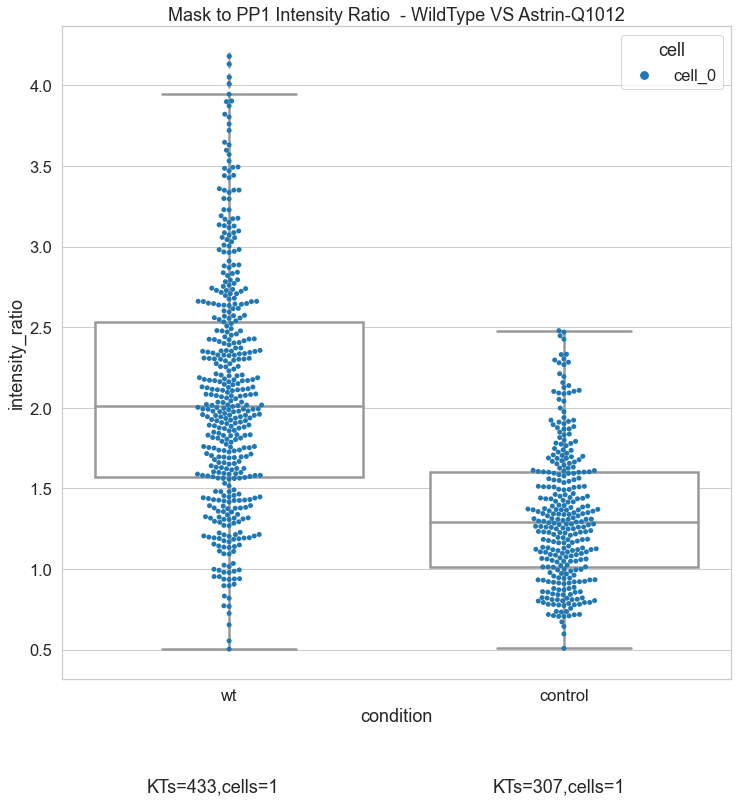

In [28]:
title="Mask to PP1 Intensity Ratio  - WildType VS Astrin-Q1012"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x='condition',y='intensity_ratio',color='white',data=df_graph).set_title(title)
sns_plot = sns.swarmplot(s=5,x='condition',y='intensity_ratio',hue='cell',data=df_graph) # change the value for s if all points are not placed in the graph
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(wt,cell_count), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(control,cell_count), horizontalalignment='center',verticalalignment='center')

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

In [29]:
#generate a dataframe with inverse for channel to mask ratio
df_inverse= df_graph.copy()
df_inverse['intensity_ratio'] = df_graph['intensity_ratio'].apply(lambda x: 1/ x)

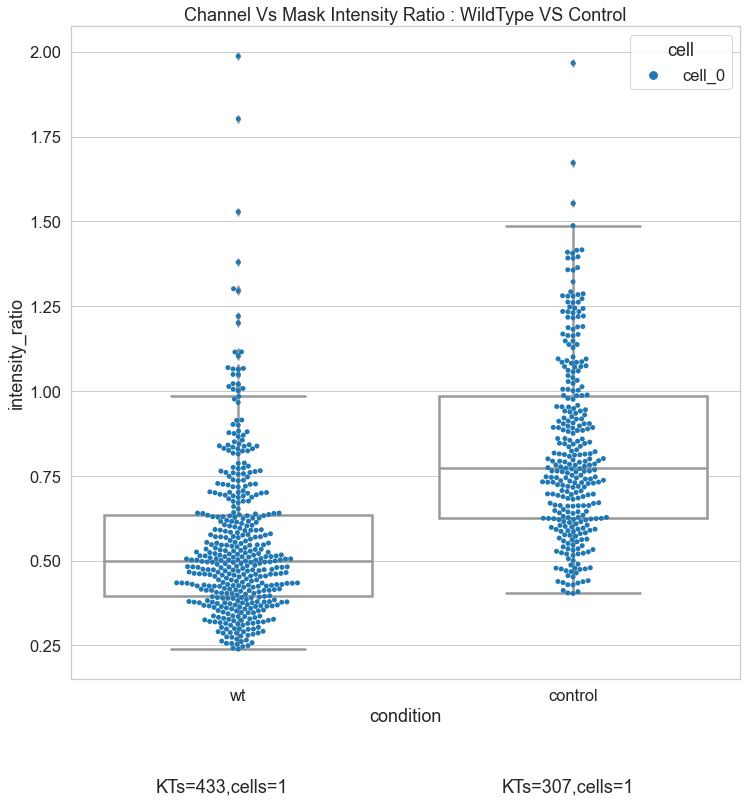

In [31]:
# channel to mask


title="Channel Vs Mask Intensity Ratio : WildType VS Control"
plt.figure(figsize=(12,12))
sns_plot=sns.boxplot(x='condition',y='intensity_ratio',color='white',data=df_inverse).set_title(title)
sns_plot = sns.swarmplot(s=5,x='condition',y='intensity_ratio',hue='cell',data=df_inverse)
plt.figtext(0.3, 0, 'KTs=%s,cells=%s'%(wt,cell_count), horizontalalignment='center',verticalalignment='center')
plt.figtext(0.7, 0, 'KTs=%s,cells=%s'%(control,cell_count), horizontalalignment='center',verticalalignment='center')


sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()
                                                    

